## **Problem Statement**

The dataset gives you information about a marketing campaign of a Portuguese bank in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

**Independent Feature:**

Age - Age of customer
job - Customer Job
marital- Single or Married
education - Education of customer
default - Has caredit card or not
housing - Has housing loan or not
loan - has personal loan or not
contact - contact communication type (mobile or telephone)
month - last contacted month in year
day_of_week - last contacted day in a week
duration -How much time the campaign went
campaign - no of times contacted for campaign for this customer
pdays - no of days passed after the last campaign contacted
previous- no of contacts performed before making current capaign
poutcome - outcome of previous campaign whether it gets succed or not
emp.var.rate- employment variation rate (quaterly indicator)
cons.price.idx - consumer price index (monthly)
cons.conf.idx -consumer confidence indwx (Monthly )
euribor3m - euribor 3 months rate - daily indicator
nr.employed - no of employee (quaterly indicator)

**Dependent Feature/ Target valriable:**

Deposit - client subscribed to term deposit or not

Importing necessary libraries


In [190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score

In [25]:
df= pd.read_csv("/content/bank-additional-full.csv", sep=";") #delimiter for separating the colu

In [29]:
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
df.tail(5)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
14765,49,blue-collar,divorced,unknown,unknown,no,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
14766,49,blue-collar,divorced,unknown,unknown,yes,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
14767,34,technician,divorced,professional.course,no,no,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
14768,27,services,married,high.school,no,no,no,cellular,jul,wed,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
14769,32,blue-collar,single,basic.6y,no,yes,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.000,NaN,NaN,NaN,NaN


In [30]:
df.shape

(41188, 21)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [32]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [33]:
df.nunique()

,0
age,78
job,12
marital,4
education,8
default,3
housing,3
loan,3
contact,2
month,10
day_of_week,5


In [34]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [35]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
41183,False
41184,False
41185,False
41186,False


In [36]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [37]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


In [38]:
df.dtypes.value_counts()

,count
object,11
int64,5
float64,5


In [39]:
df.rename(columns={"y":"deposit"},inplace=True)

In [54]:
print(df['deposit'].value_counts())

print(df['deposit'].value_counts(normalize=True)*100) # checking data is balanced or not


deposit
0    36548
1     4640
Name: count, dtype: int64
deposit
0    88.734583
1    11.265417
Name: proportion, dtype: float64


above Output feature is imbalanced. No is 36548 and Yes is 4640. Model predict No more often.
Need:
Class balancing
proper evalution metrics


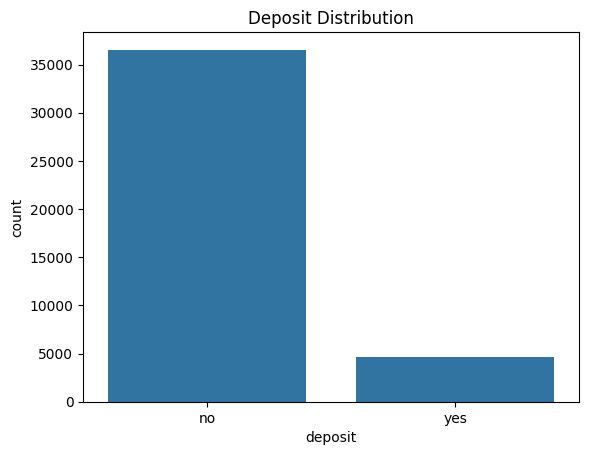

In [41]:
sns.countplot(x='deposit',data=df)
plt.title("Deposit Distribution")
plt.show()

Above Countplot clearly shows the target variable is imbalanced. Majority 80% of customer saying no and 11% customer saying yes.

In [42]:
df['deposit']= df['deposit'].map({'no':0,'yes':1})

In [51]:
num_cols= df.select_dtypes(include=['int64','float64'])


In [60]:
num_cols

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
5,45,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [67]:
num_cols.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'deposit'],
      dtype='object')

In [68]:
target_col ='deposit'
num_columns= num_cols.drop(columns=[target_col])

In [70]:
num_columns.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [71]:
num_columns.skew() # check for skewness in data distribution.Its tells the data is symmetrical, positive skew or negativ e skewed

,0
age,0.784859
duration,3.263055
campaign,4.762429
pdays,-4.922056
previous,3.831934
emp.var.rate,-0.724019
cons.price.idx,-0.230804
cons.conf.idx,0.303285
euribor3m,-0.709111
nr.employed,-1.044199


Campaign =4.7
Highly +ve skewed
*   Most customers were contacted very few times
*   a small no of customers were contacted many time

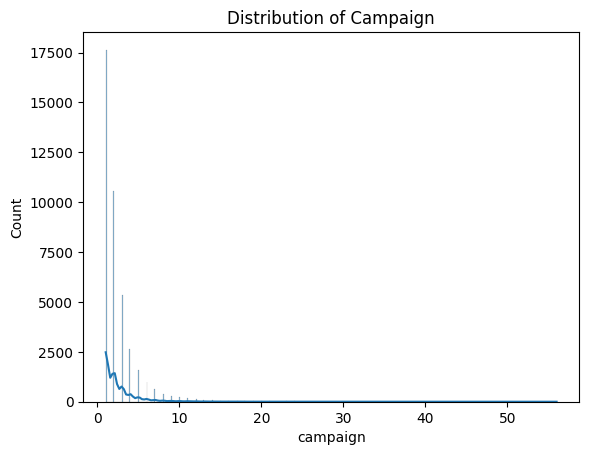

In [72]:
sns.histplot(df['campaign'],kde=True)
plt.title('Distribution of Campaign')
plt.show()

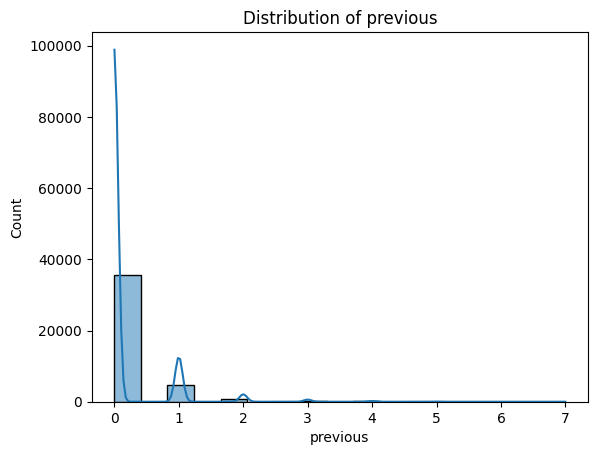

In [73]:
sns.histplot(df['previous'],kde=True)
plt.title('Distribution of previous')
plt.show()

Previous  = 3.8


*   Highly +ve skewed
*   most values are 0
*   Very few customers were contacted before multiple times
*   Most clients not contacted previously

Age is slightly skewed. campaign duration, previous columns are highly positive skewed. pdays are highly negative skewed.

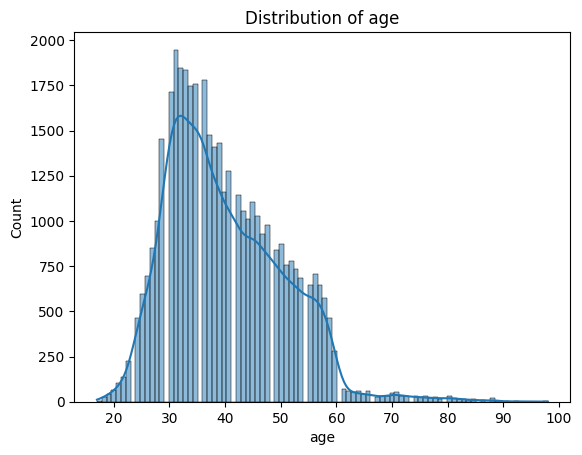

In [76]:
sns.histplot(df['age'],kde=True)
plt.title('Distribution of age')
plt.show()

In [74]:
# reduce skeweness using log transform or Square root
df['campaign_log']= np.log1p(df['campaign'])
df['previous_log']= np.log1p(df['previous'])

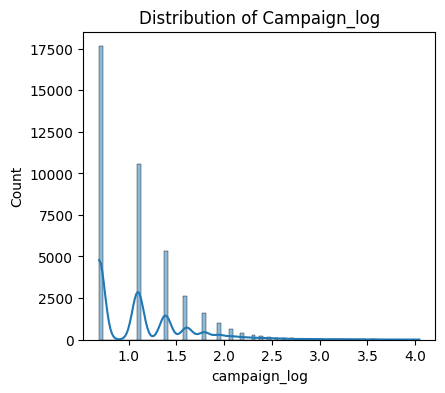

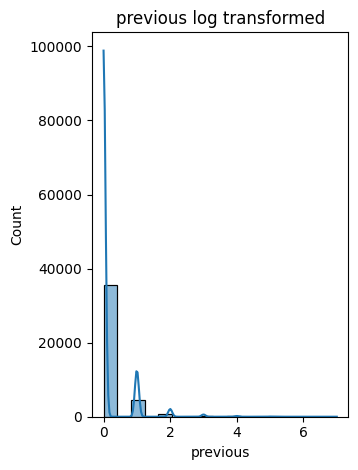

In [77]:
plt.figure(figsize=(10,4))

#Graph 1
plt.subplot(1,2,1)
sns.histplot(df['campaign_log'],kde=True)
plt.title('Distribution of Campaign_log')
plt.show()

#Graph 2
plt.subplot(1,2,2)
sns.histplot(df['previous'],kde=True)
plt.title('previous log transformed')
plt.tight_layout()
plt.show()


After log transform
-tail is compressed
-Distribution is more balanced
-Skewness value drops significantly

pdays = highly negative skewed here u need to understand this column
no of days since the customer was last contacted in a previous capmpaign
999 -> customer was not previously contacted
Most numners are 999 very few are actual numbers

In [78]:
df['pdays_contacted']= df['pdays'].apply(lambda x:0 if x==999 else 1)
#this converts it to 0 or 1

In [80]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit', 'campaign_log',
       'previous_log', 'pdays_contacted'],
      dtype='object')

Numerical data distribution Analysis


In [81]:
num_columns.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

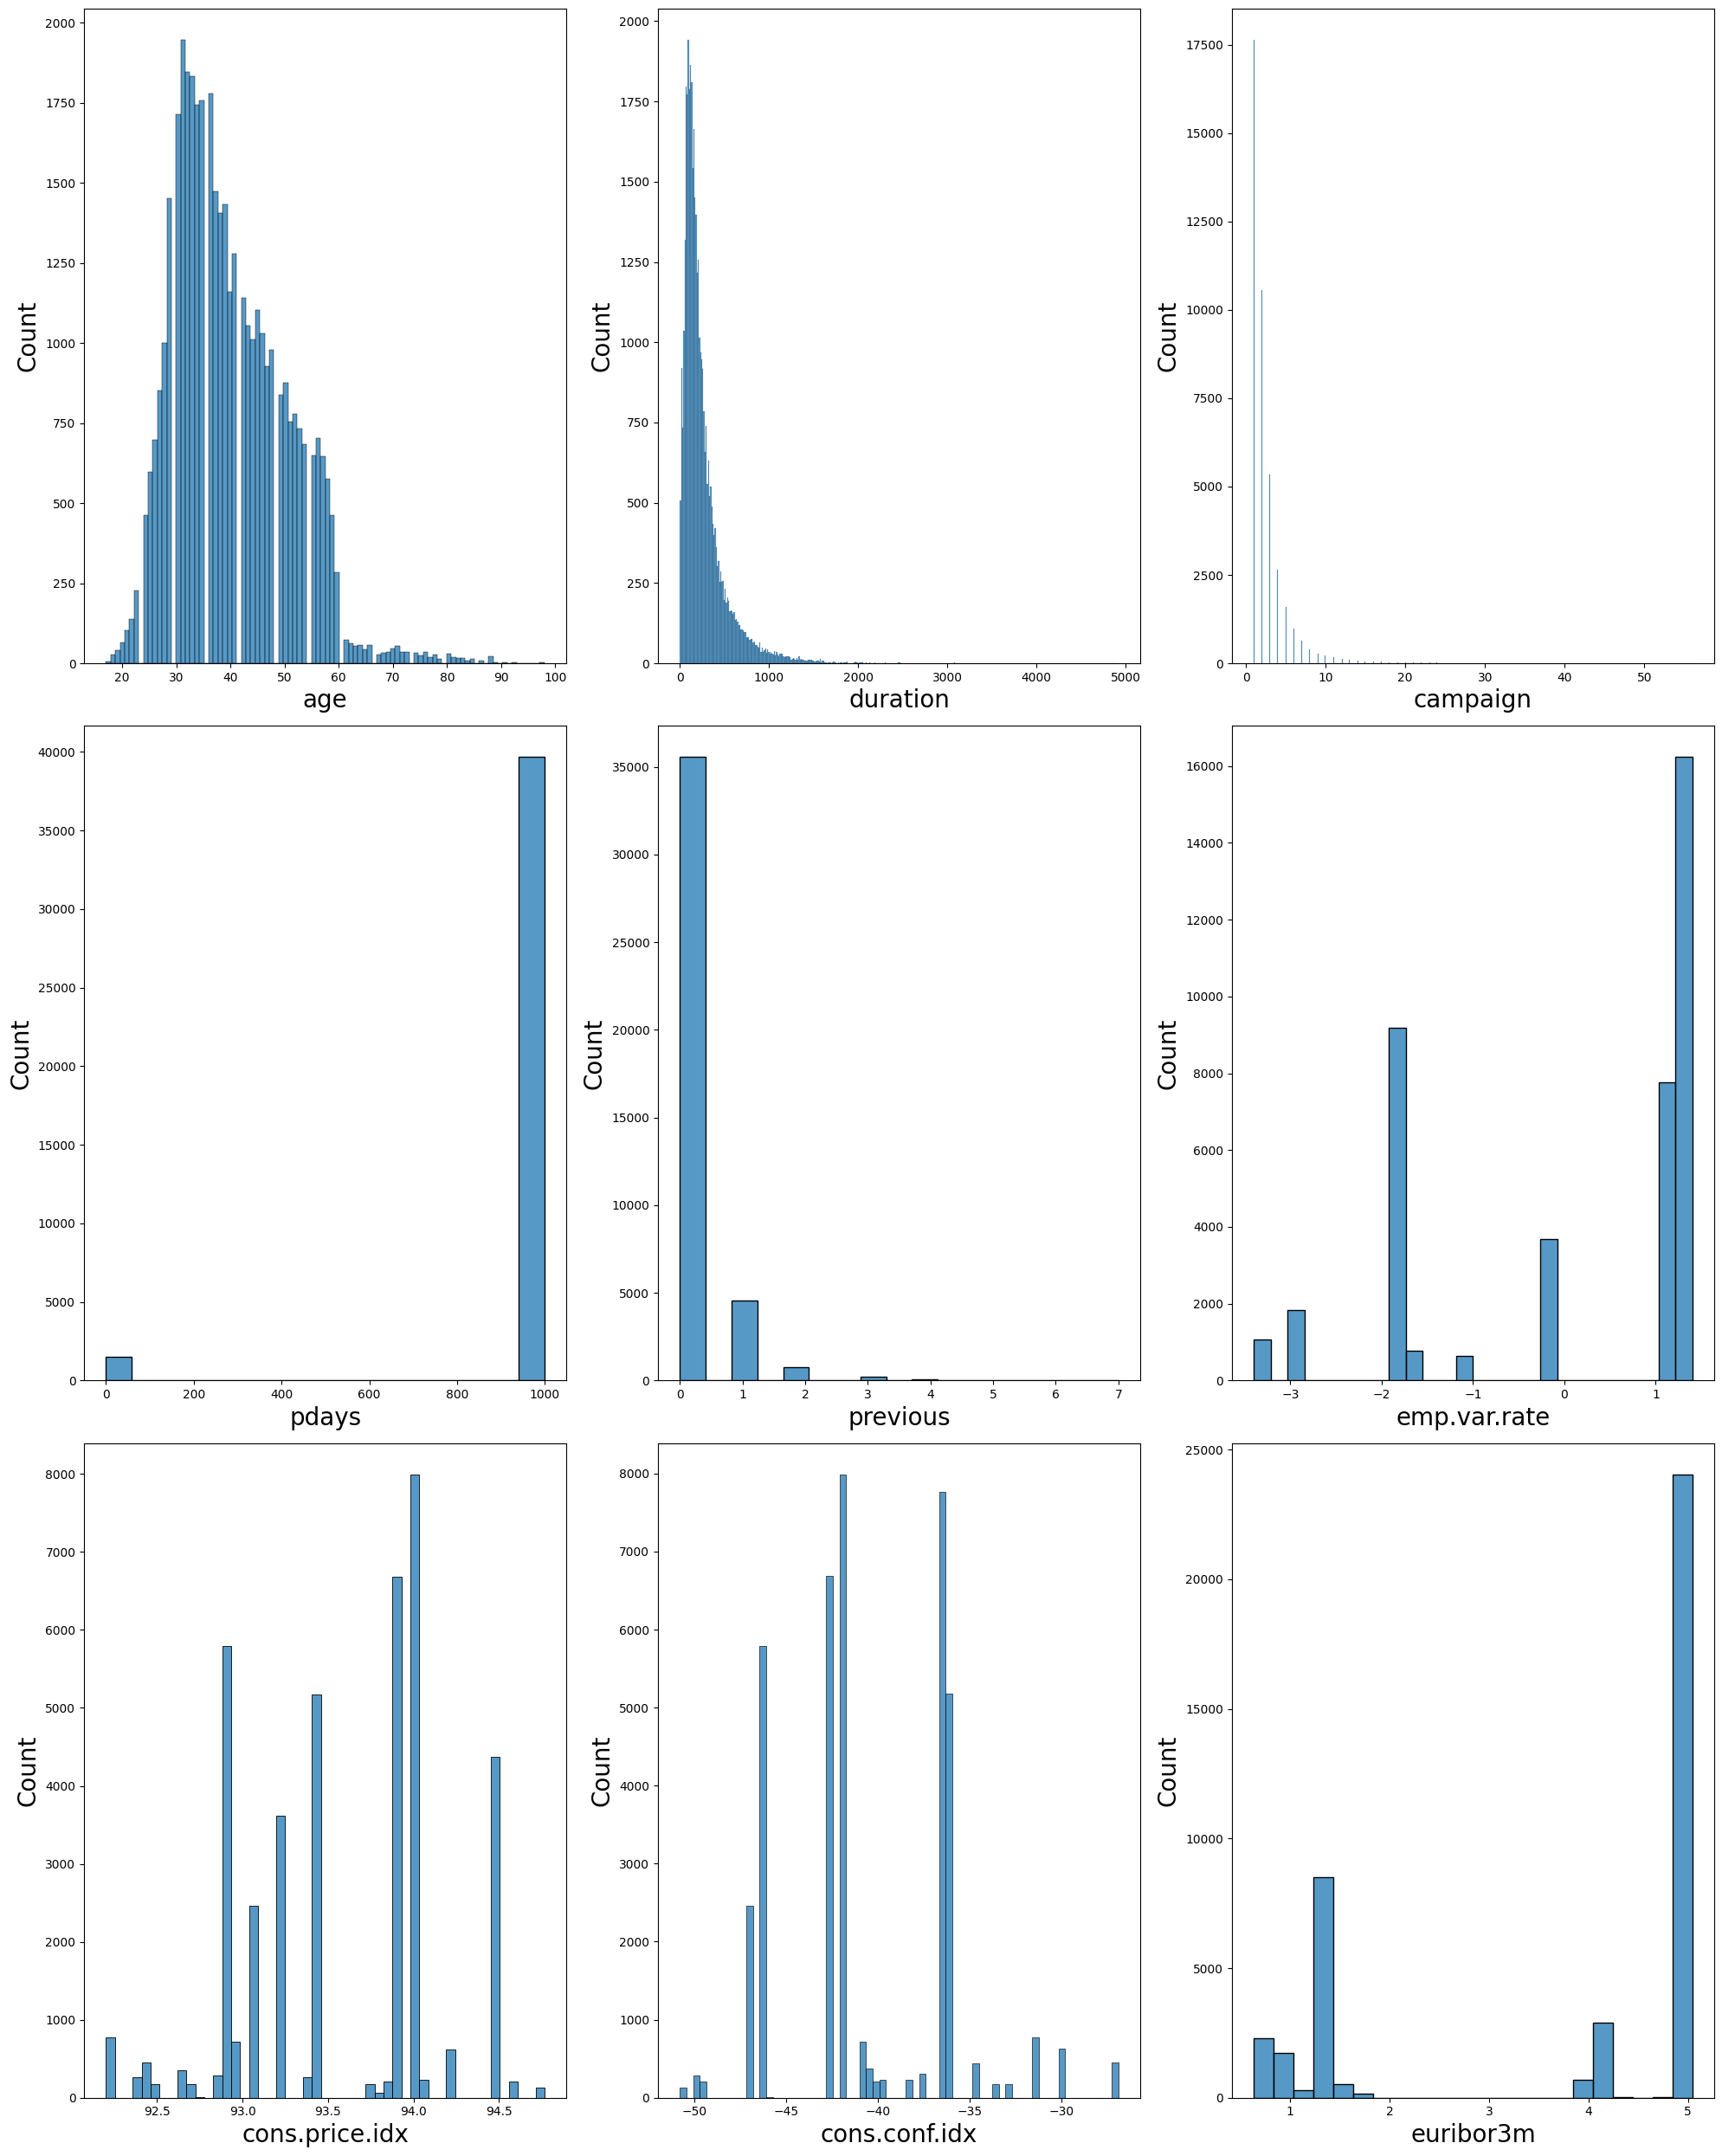

In [82]:
#Histogram for checking data distribution for numerical columns

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for col in num_columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df[col])
        plt.xlabel(col,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()


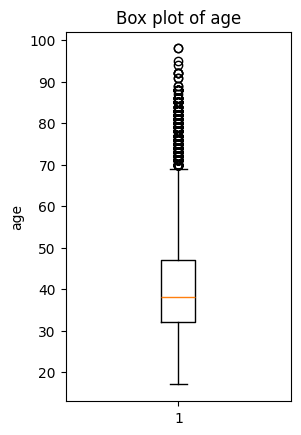

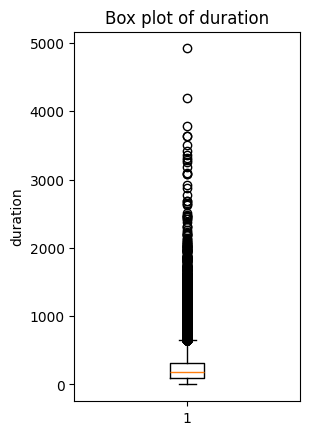

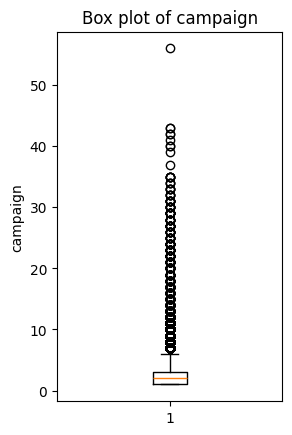

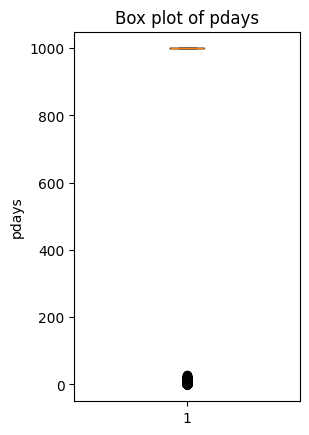

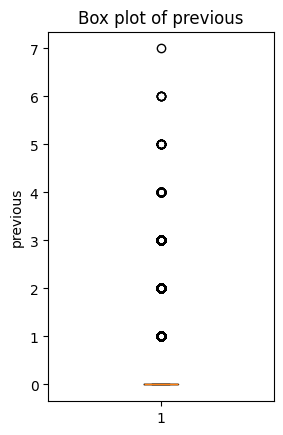

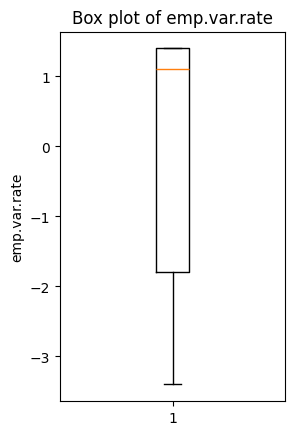

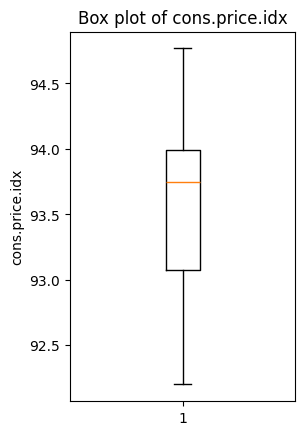

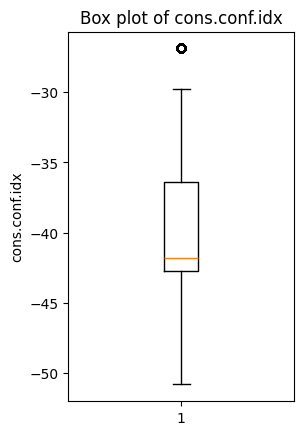

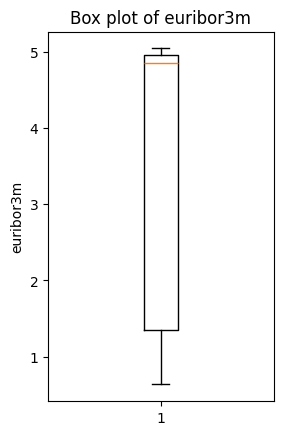

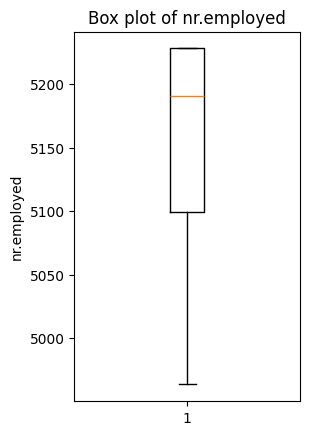

In [83]:
#Boxplot for finding Outliers present in numerical columns

for col in num_columns:
  plt.subplot(1,2,2)
  plt.boxplot(df[col])
  plt.title(f'Box plot of {col}')
  plt.ylabel(col)
  plt.show()

In [84]:
def cap_outliers(df,columns):
   Q1 = df[columns].quantile(0.25)
   Q3 = df[columns].quantile(0.75)
   IQR = Q3-Q1
   lower = Q1 -1.5*IQR
   upper = Q3+ 1.5*IQR
   df[columns] = df[columns].clip(lower,upper)
   return df

for col in num_columns:
    df = cap_outliers(df,col)

In [85]:
num_columns.head(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [87]:
df['deposit'].value_counts()

,count
deposit,
0,36548
1,4640


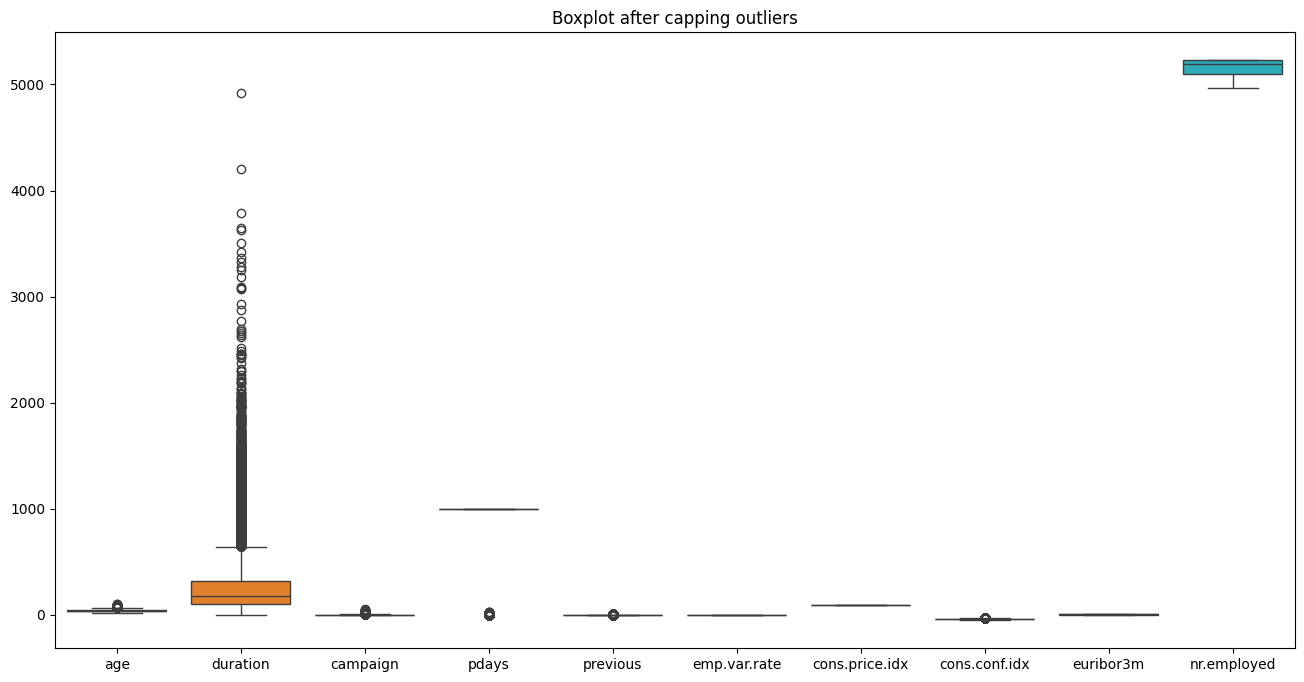

In [89]:
# boxplot after capping
plt.figure(figsize =(16,8))
sns.boxplot(data=num_columns)
plt.title("Boxplot after capping outliers")
plt.show()

In [90]:
corr_matrix= num_columns.corr()
corr_matrix

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000849,0.004637,-0.034386,0.024393,-0.000420,0.000801,0.129314,0.010714,-0.017752
duration,-0.000849,1.000000,-0.071706,-0.047575,0.020637,-0.027962,0.005320,-0.008164,-0.032890,-0.044700
campaign,0.004637,-0.071706,1.000000,0.052589,-0.079152,0.150774,0.127858,-0.013709,0.135155,0.144106
pdays,-0.034386,-0.047575,0.052589,1.000000,-0.587513,0.271001,0.078883,-0.091353,0.296896,0.372603
previous,0.024393,0.020637,-0.079152,-0.587513,1.000000,-0.420484,-0.203121,-0.050922,-0.454489,-0.501330
emp.var.rate,-0.000420,-0.027962,0.150774,0.271001,-0.420484,1.000000,0.775329,0.196019,0.972244,0.906971
cons.price.idx,0.000801,0.005320,0.127858,0.078883,-0.203121,0.775329,1.000000,0.058957,0.688222,0.522030
cons.conf.idx,0.129314,-0.008164,-0.013709,-0.091353,-0.050922,0.196019,0.058957,1.000000,0.277664,0.100501
euribor3m,0.010714,-0.032890,0.135155,0.296896,-0.454489,0.972244,0.688222,0.277664,1.000000,0.945157
nr.employed,-0.017752,-0.044700,0.144106,0.372603,-0.501330,0.906971,0.522030,0.100501,0.945157,1.000000


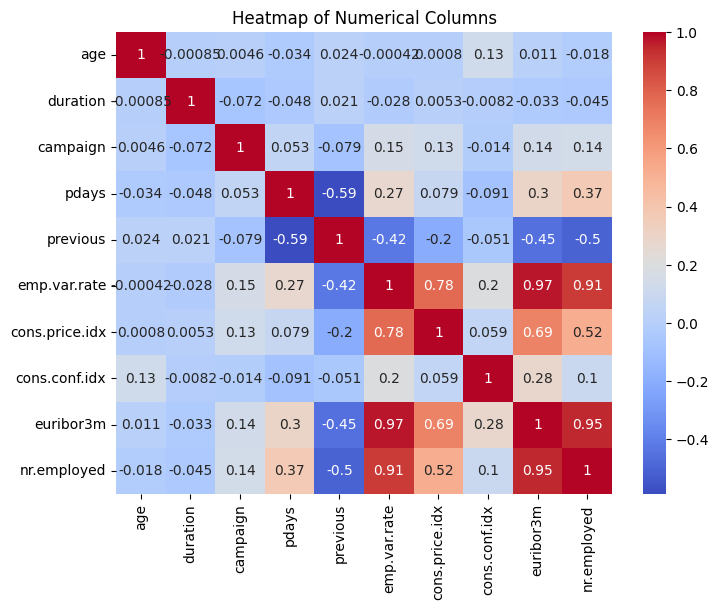

In [91]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("Heatmap of Numerical Columns")
plt.show()

In [133]:
corr_target = df.corr()['deposit'].sort_values(ascending=False)
corr_target

,deposit
deposit,1.000000
duration,0.401286
pdays_contacted,0.324877
poutcome_success,0.316269
previous_log,0.222947
month_mar,0.144014
month_oct,0.137366
month_sep,0.126067
job_student,0.093955
job_retired,0.092221


In [92]:
cat_cols = df.select_dtypes(include=['object','bool','category'])

In [93]:
cat_cols

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


# **Multivariate Analysis**

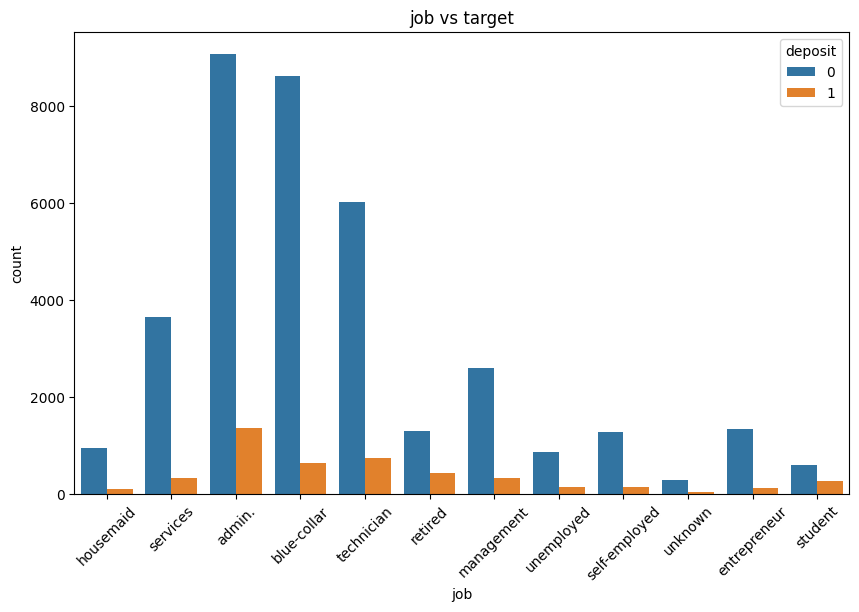

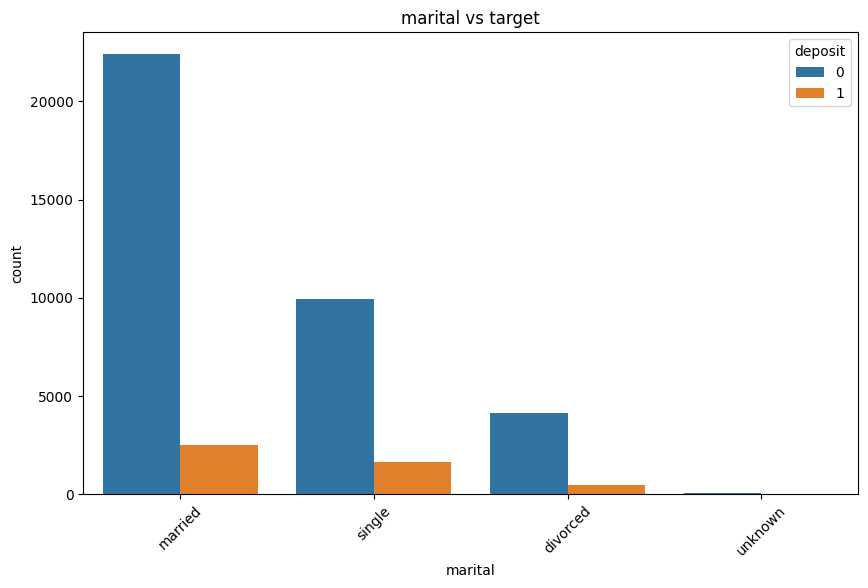

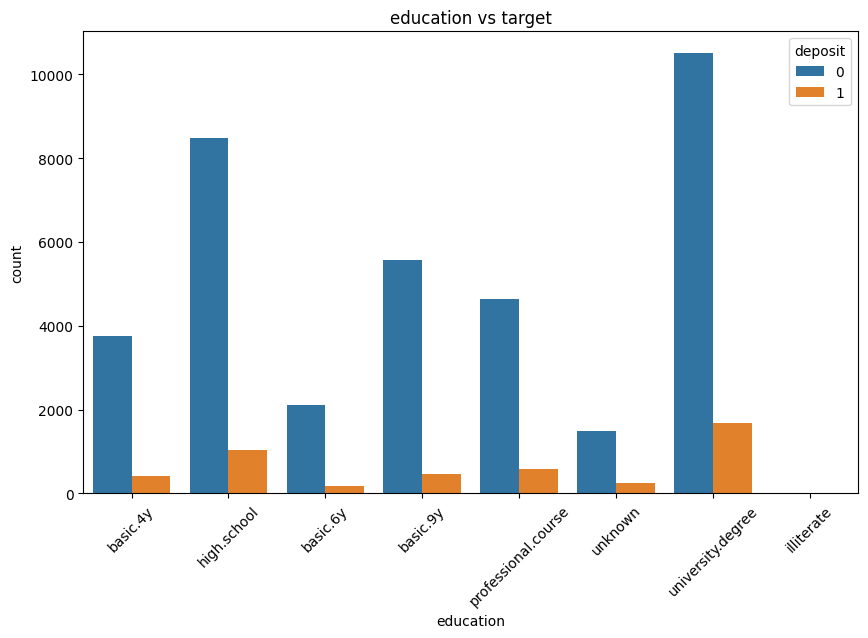

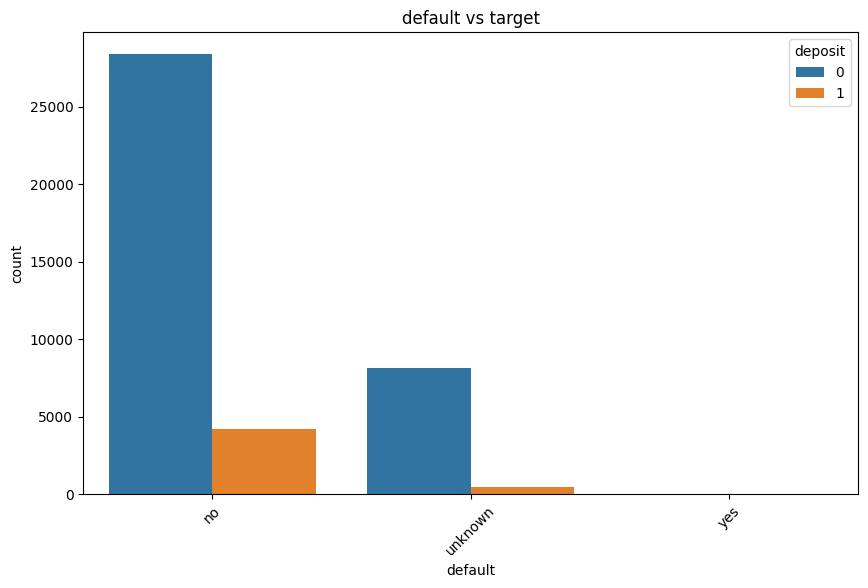

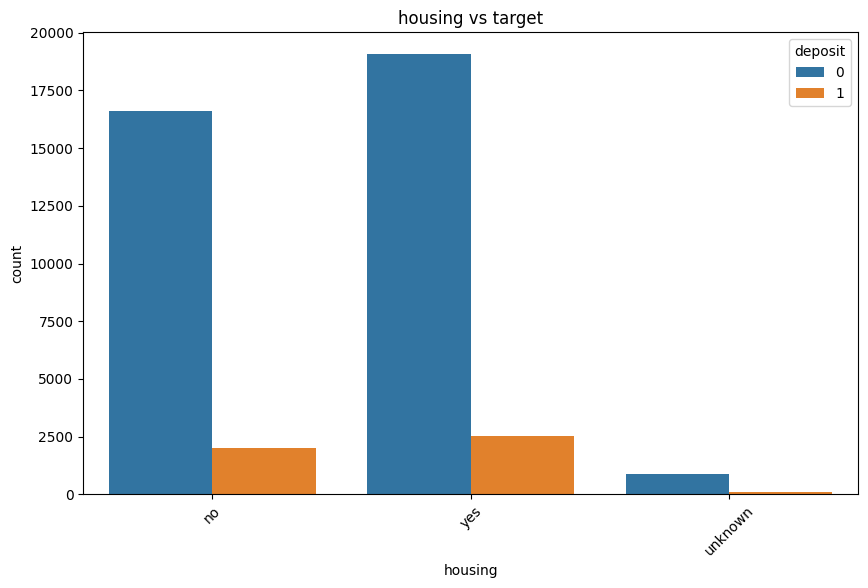

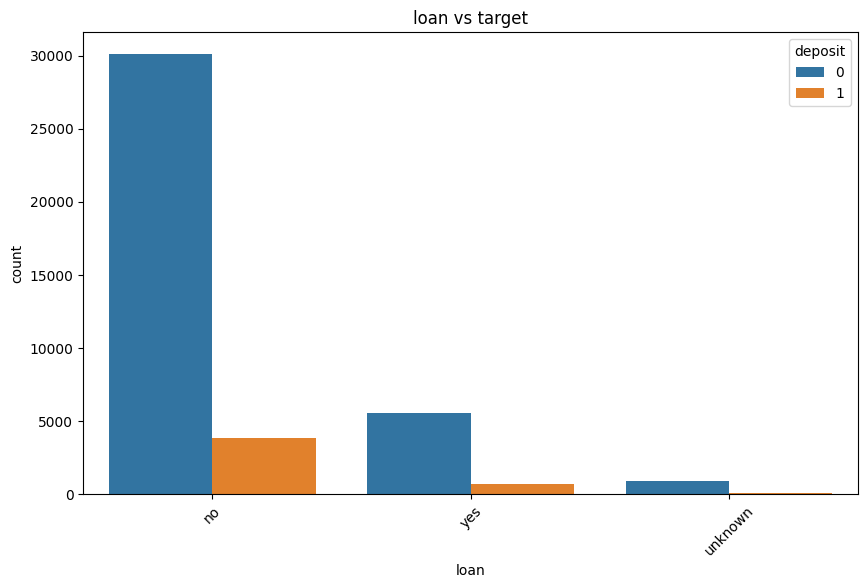

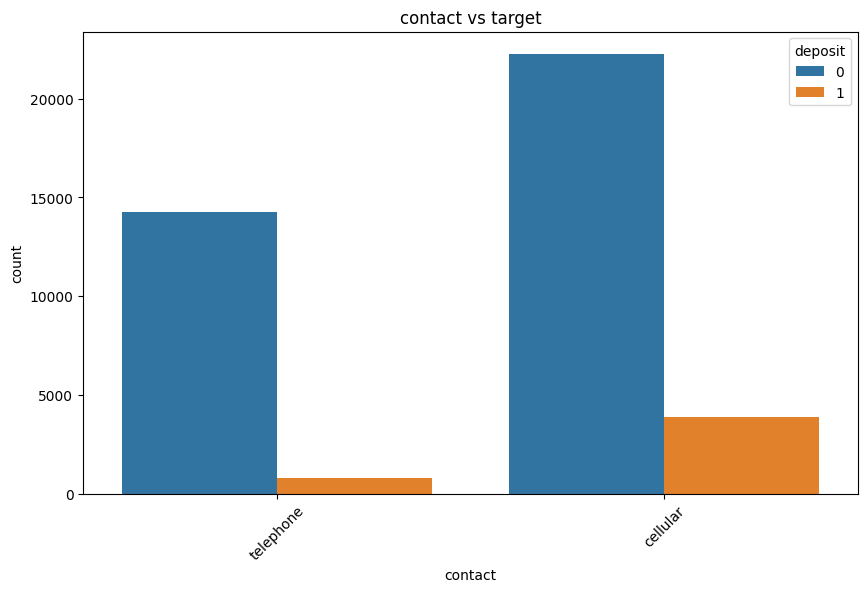

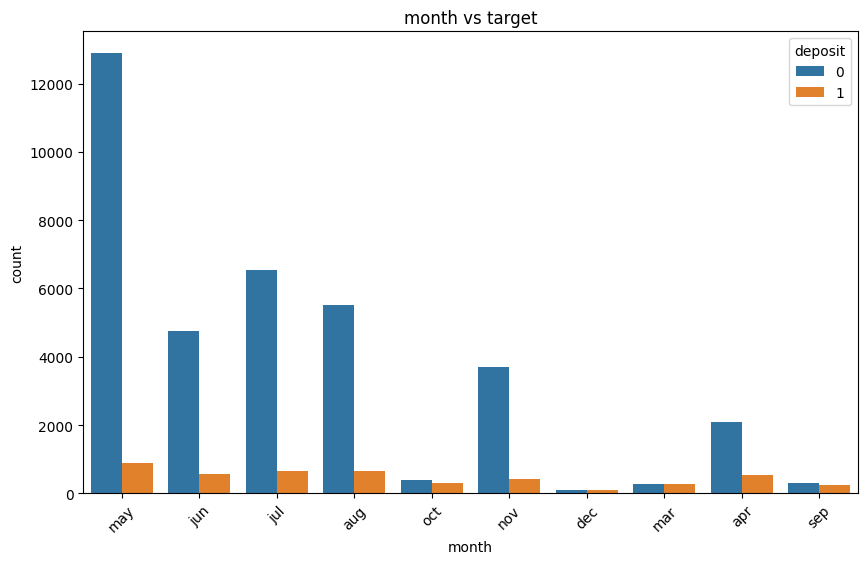

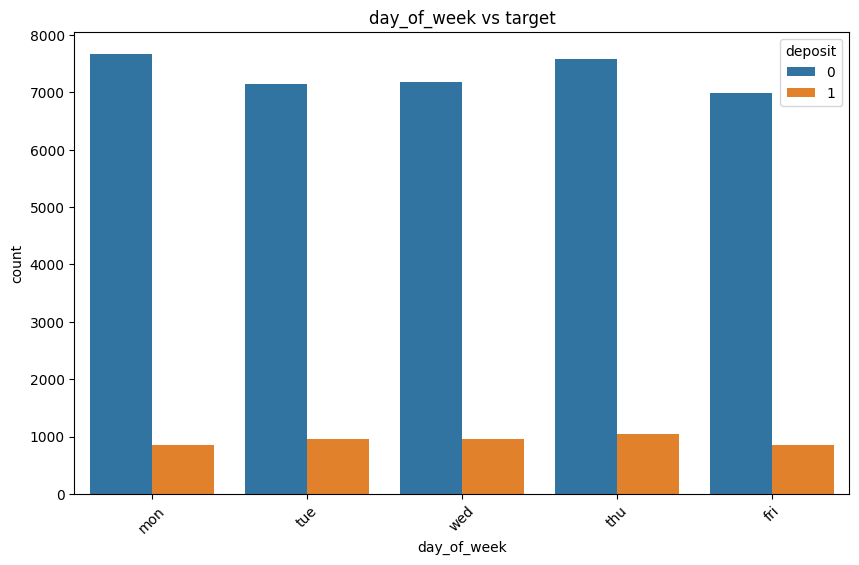

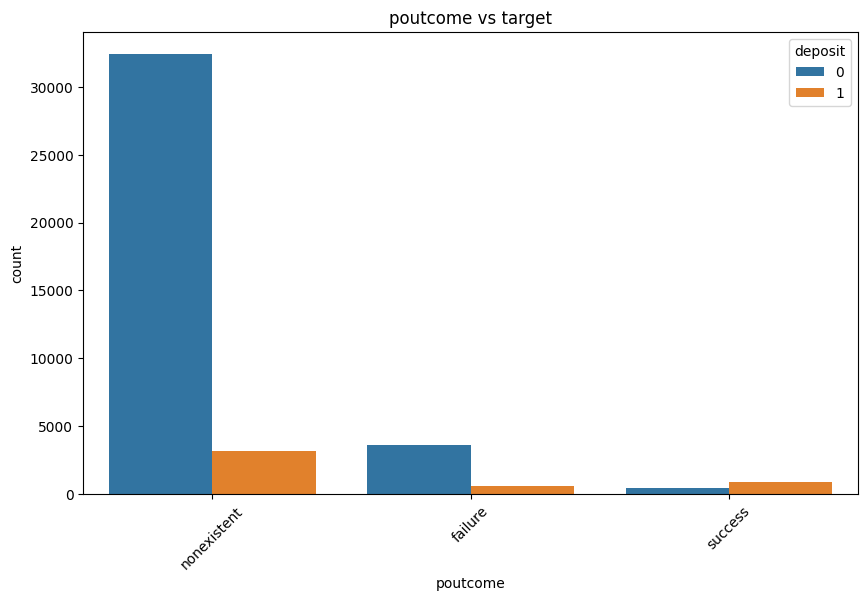

In [94]:
for col in cat_cols:
  plt.figure(figsize=(10,6))
  sns.countplot(x=df[col],hue=df['deposit'])
  plt.title(f'{col} vs target')
  plt.ylabel('count')
  plt.xticks(rotation=45)
  plt.show()


Contact = Cellular has more subscription
housing = no

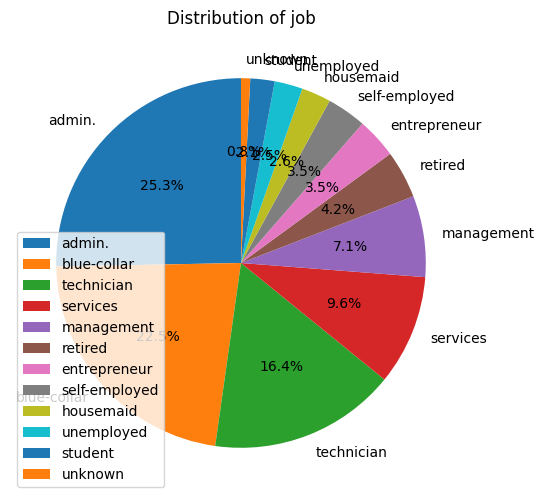

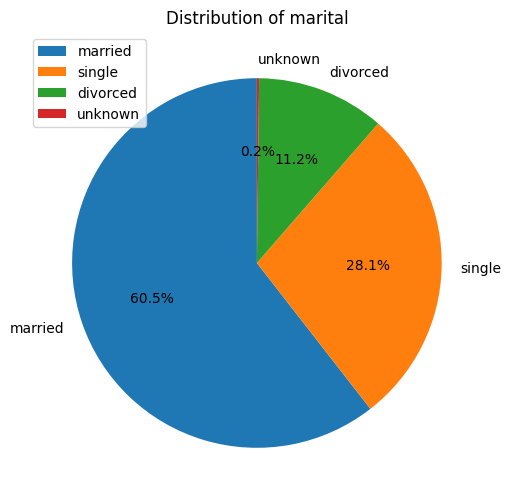

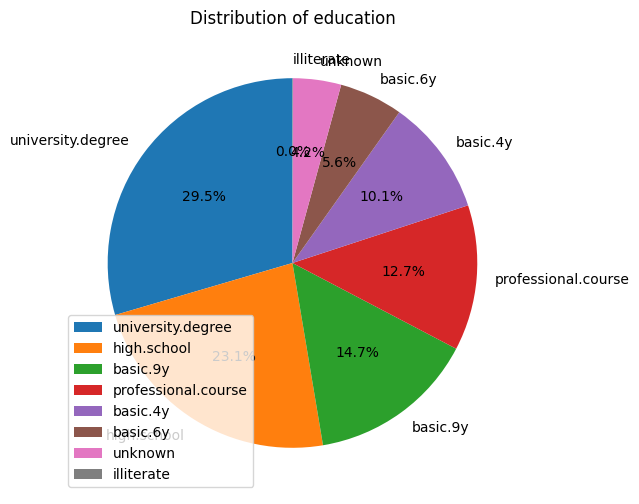

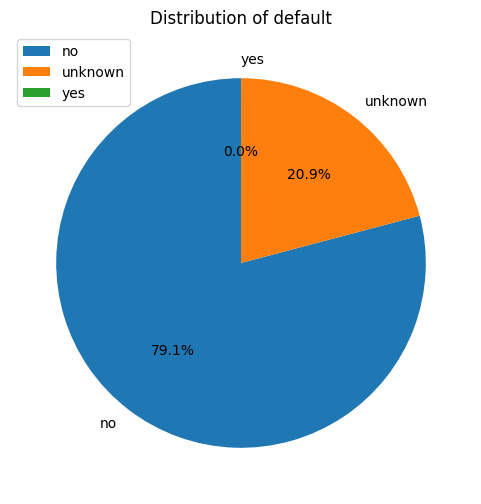

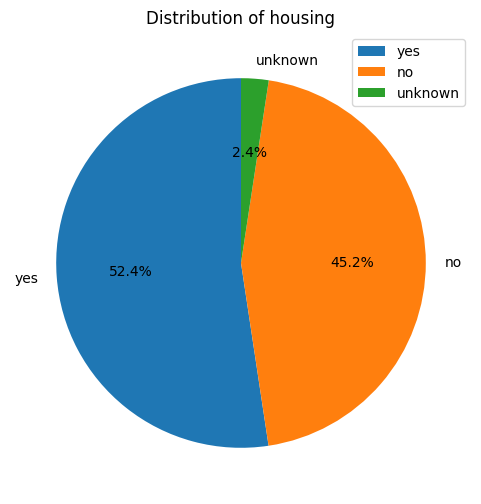

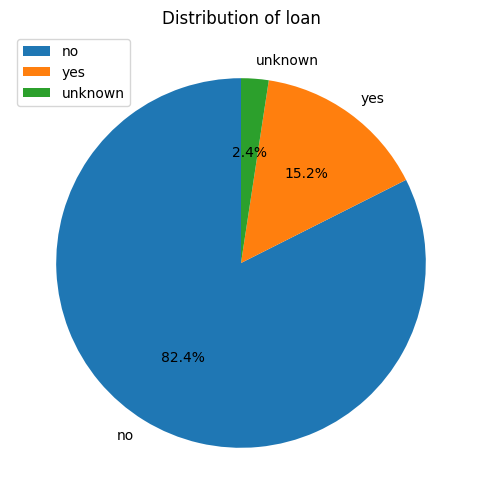

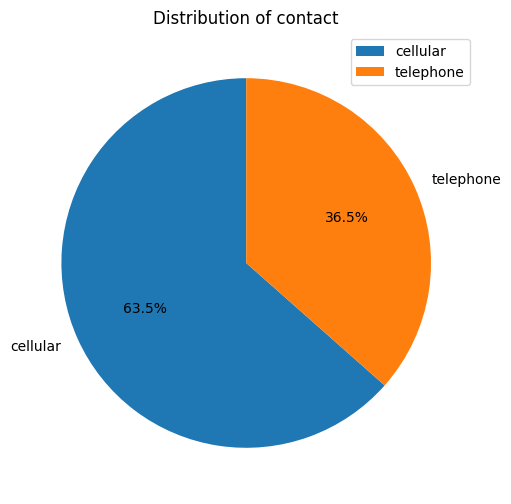

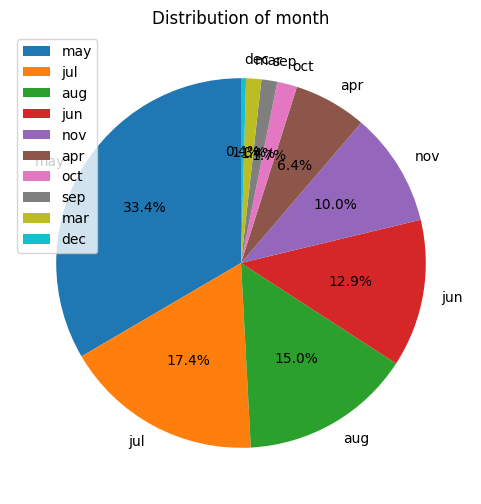

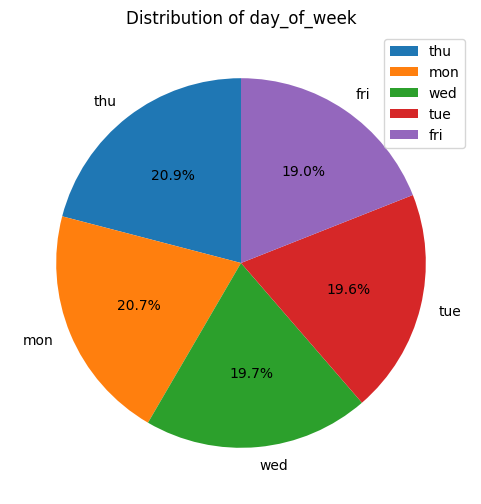

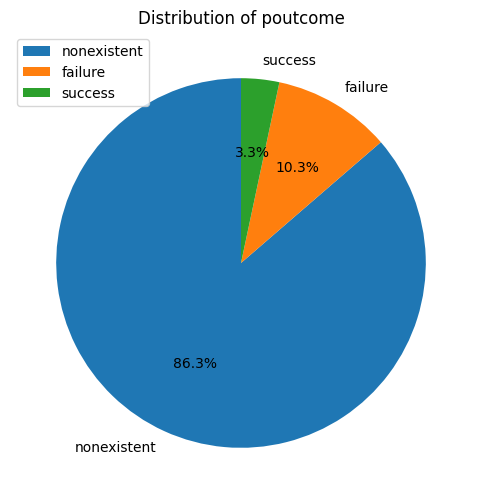

In [95]:
for col in cat_cols:
   counts = df[col].value_counts()

   plt.figure(figsize=(6,6))
   plt.pie(counts,labels= counts.index, autopct='%1.1f%%',startangle=90)
   plt.title(f'Distribution of {col}')
   plt.legend()
   plt.show()

In [96]:
cat_cols.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

Do encoding to change from categorical to numerical .

**if its nominal** **(no order)**
ex: job,maritial, month,default, housing, loan, poutcome...
**use one hot encoding**

**Ordinal (order**)
ex: education
**use Label encoding or ordinal encoding**

In [97]:
df['education'].value_counts()

,count
education,
university.degree,12168
high.school,9515
basic.9y,6045
professional.course,5243
basic.4y,4176
basic.6y,2292
unknown,1731
illiterate,18


In [98]:
# ordinal encoding for Education
education_order=['unknown','illiterate','basic.4y','basic.6y','basic.9y','high.school','professional.course','university.degree']

ord_enc = OrdinalEncoder(categories=[education_order])
df['education']= ord_enc.fit_transform(df[['education']])


In [99]:
df['education']

,education
0,2.0
1,5.0
2,5.0
3,3.0
4,5.0
...,...
41183,6.0
41184,6.0
41185,7.0
41186,6.0


In [100]:
# nominal features (One-hot -encoding)
nominal_enc= ['job','marital','default','housing','loan','contact','month', 'day_of_week', 'poutcome']
df=pd.get_dummies(df,columns=nominal_enc,drop_first=True)

In [101]:
df.head(2)

,age,education,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56.0,2.0,261.0,1,999,0,1.1,93.994,-36.4,4.857,...,True,False,False,False,True,False,False,False,True,False
1,57.0,5.0,149.0,1,999,0,1.1,93.994,-36.4,4.857,...,True,False,False,False,True,False,False,False,True,False


In [102]:
df=df.replace({True:1,False:0})

/tmp/ipython-input-3566451038.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({True:1,False:0})


In [103]:
df.head(2)

,age,education,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56.0,2.0,261.0,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0
1,57.0,5.0,149.0,1,999,0,1.1,93.994,-36.4,4.857,...,1,0,0,0,1,0,0,0,1,0


In [104]:
df['deposit'].value_counts()

,count
deposit,
0,36548
1,4640


In [105]:
x= df.drop(['deposit','duration','pdays'],axis=1)
y=df['deposit']
print(x)

        age  education  campaign  previous  emp.var.rate  cons.price.idx  \
0      56.0        2.0         1         0           1.1          93.994   
1      57.0        5.0         1         0           1.1          93.994   
2      37.0        5.0         1         0           1.1          93.994   
3      40.0        3.0         1         0           1.1          93.994   
4      56.0        5.0         1         0           1.1          93.994   
...     ...        ...       ...       ...           ...             ...   
41183  69.5        6.0         1         0          -1.1          94.767   
41184  46.0        6.0         1         0          -1.1          94.767   
41185  56.0        7.0         2         0          -1.1          94.767   
41186  44.0        6.0         1         0          -1.1          94.767   
41187  69.5        6.0         3         0          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  campaign_log  ...  month_may  \
0        

In [106]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: deposit, Length: 41188, dtype: int64


In [107]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y) # stratify keeps same class ratio in train & test

In [183]:
y_train.value_counts()  #imbalanced , Balance the target using SMOTE for only training data

,count
deposit,
0,29238
1,3712


In [109]:
num_columns = x_train.select_dtypes(include=['int64','float64']).columns

In [113]:
num_columns

Index(['age', 'education', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'campaign_log', 'previous_log', 'pdays_contacted', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'default_unknown', 'default_yes', 'housing_unknown',
       'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [114]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x_train[num_columns]= scaler.fit_transform(x_train[num_columns])
x_test[num_columns]= scaler.fit_transform(x_test[num_columns])

In [115]:
smote = SMOTE(random_state=42)
x_train_bal,y_train_bal = smote.fit_resample(x_train,y_train)

In [116]:
y_train_bal.value_counts()  # now its balanced (SMOTE is applied only on training data)

,count
deposit,
0,29238
1,29238


In [161]:
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'KNN': KNeighborsClassifier()
          }

---Logistic Regression---
Accuracy : 0.8258
Precsion: 0.3534
F1 Score:0.4599
Recall : 0.6584
confusion Matrix:
[[6192 1118]
 [ 317  611]]
ROC AUC: 0.7527
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      7310
           1       0.35      0.66      0.46       928

    accuracy                           0.83      8238
   macro avg       0.65      0.75      0.68      8238
weighted avg       0.88      0.83      0.85      8238


---Decision Tree---
Accuracy : 0.8411
Precsion: 0.3263
F1 Score:0.3536
Recall : 0.3858
confusion Matrix:
[[6571  739]
 [ 570  358]]
ROC AUC: 0.6423
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      7310
           1       0.33      0.39      0.35       928

    accuracy                           0.84      8238
   macro avg       0.62      0.64      0.63      8238
weighted avg       0.85      0.84      0.85      8238


---Random Forest---
Accuracy : 0.8898
Prec

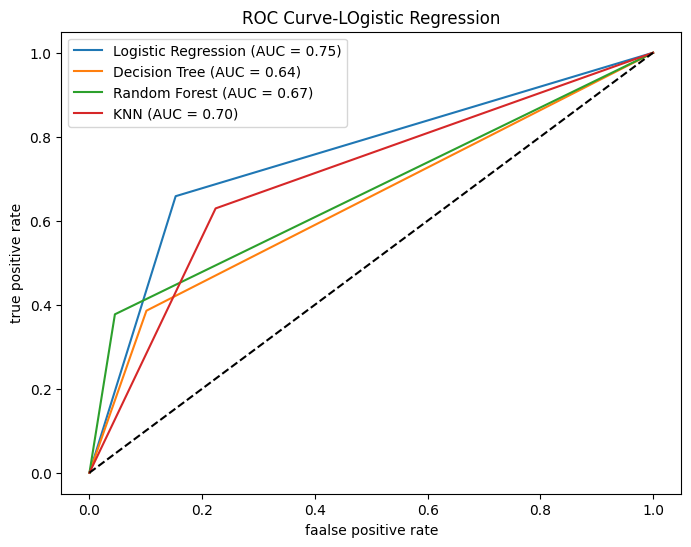

In [191]:
results={}
plt.figure(figsize=(8,6))
for name, model in models.items():
     # Train model
     model.fit(x_train_bal,y_train_bal)

     #Prediction
     y_pred = model.predict(x_test)

     #Probability for ROC
     if hasattr(model, "Predict_proba"):
         y_prob =model.predict_proba(x_test)[:,1]
     else:
         y_prob =model.predict(x_test)

     #metrics
     f1 = f1_score(y_test,y_pred)
     recall =recall_score(y_test,y_pred)
     cm = confusion_matrix(y_test,y_pred)
     roc_auc = roc_auc_score(y_test,y_pred)
     pre = precision_score(y_test,y_pred)


    #accuracy
     acc = accuracy_score(y_test,y_pred)
     results[name] =acc

     print(f"---{name}---")
     print(f"Accuracy : {acc:.4f}")
     print(f"Precsion: {pre:.4f}")
     print(f"F1 Score:{f1:.4f}")
     print(f"Recall : {recall:.4f}")
     print("confusion Matrix:")
     print(cm)
     print(f"ROC AUC: {roc_auc:.4f}")
     print(classification_report(y_test,y_pred))
     print(f"{'='*30}\n")

    #Roc Curve
     fpr,tpr,_= roc_curve(y_test,y_prob)
     plt.plot(fpr,tpr,label= f'{name} (AUC = {roc_auc:.2f})')

#final ROC Plot
plt.plot([0,1],[0,1],'k--')
plt.xlabel('faalse positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve-LOgistic Regression')
plt.legend()
plt.show()

# Insights:
Random Forest has higher precision (0.51)-> fewer false positive
recall is lower-> it misses a lot of actual positive
f1 score (0.44) -> slightly lower than logistic regression(0.46)

Logistic is better at catching most positives (recall)

[[6192 1118]
 [ 316  612]]


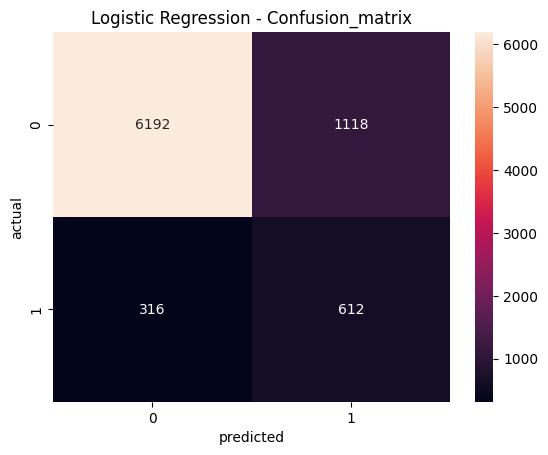

In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Logistic Regression - Confusion_matrix')
plt.show()

Check ROC-AUCm